<a href="https://colab.research.google.com/github/Alicexxue/MMA-869/blob/main/MMA_MMAB_MMAI_2023_869_Individual_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MMA/MMAB/MMAI 869 2023: Individual Assignment

Version 1: Updated May 16, 2022

<font color='red'>\# TODO: fill in the below</font>

- [First name, Last name]
- [Student number]
- [Section number]
- [Favorite book]
- [Date]

# Assignment Instructions

This assignment contains four questions. The questions are fully contained in this Google Colab Notebook. 

You are to make a copy of this Notebook and edit the copy to provide your answers. You are to complete the assignment entirely within Google Colab. Why?

- It gives you practice using cloud-based interactive notebook environments (which is a popular workflow)
- It is easier for you to manage the environment (e.g., installing packages, etc.)
- Google Colab has nice, beefy machines, so you don't have to worry about running out of memory on your local computer.
- It will be easier for the TA to help you debug your code if you need help
- It will be easier for the TA to mark/run your code

Some parts of this assigment require you to write code. Use Python or R. For Python, you may use standard Python libraries, including `scikit-learn`, `pandas`, `numpy`, and `scipy`. For R, you may use `dplyr`, `caret`, `ggplot2`, `rpart` and other standard libraries.

Some parts of this assignment require text responses. In these cases, type your response in the Notebook cell indicated. Use English. Use proper grammar, spelling, and punctuation. Be professional and clear. Be complete, but not overly-verbose. Feel free to use [Markdown syntax](https://www.markdownguide.org/basic-syntax/) to format your answer (i.e., add bold, italics, lists, tables).

## What to Submit to the Course Portal

- Export your completed Notebook as a PDF file by clicking File->Print->Save as PDF.
- Please do not submit the Notebook file (`.ipynb`) to the course portal. 
- Please submit the PDF export of the Notebook. 
   - Please name the PDF file `2022_869_FirstnameLastName.pdf`
      - E.g., `2022_869_StephenThomas.pdf`
   - Please make sure you have run all the cells so we can see the output!
   - Best practice: Before exporting to PDF click Runtime->Restart and run all.



# Preliminaries: Inspect and Set up environment

No action is required on your part in this section. These cells print out helpful information about the environment, just in case.

In [1]:
import datetime
import pandas as pd
import numpy as np

In [2]:
print(datetime.datetime.now())

2022-07-22 03:09:59.408846


In [3]:
!which python

/usr/local/bin/python


In [4]:
!python --version

Python 3.7.13


In [5]:
!echo $PYTHONPATH

/env/python


# Question 1: Uncle Steve's Diamonds

## Instructions

You work at a local jewelry store named *Uncle Steve's Diamonds*. You started as a janitor, but you’ve recently been promoted to senior data analyst! Congratulations.

Uncle Steve, the store's owner, needs to better understand the store's customers. In particular, he wants to know what kind of customers shop at the store. He wants to know the main types of *customer personas*. Once he knows these, he will contemplate ways to better market to each persona, better satisfy each persona, better cater to each persona, increase the loyalty of each persona, etc. But first, he must know the personas.

You want to help Uncle Steve. Using sneaky magic (and the help of Environics), you've collected four useful features for a subset of the customers: age, income, spending score (i.e., a score based on how much they’ve spent at the store in total), and savings (i.e., how much money they have in their personal bank account). 

**Your tasks**

1. Pick a clustering algorithm (the [`sklearn.cluster`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster) module has many good choices, including [`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans), [`DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN), and [`AgglomerativeClustering`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) (aka Hierarchical)). (Note that another popular implementation of the hierarchical algorithm can be found in SciPy's [`scipy.cluster.hierarchy.linkage`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html).) Don't spend a lot of time thinking about which algorithm to choose - just pick one. Cluster the customers as best as you can, within reason. That is, try different feature preprocessing steps, hyperparameter values, and/or distance metrics. You don't need to try every posssible combination, but try a few at least. Measure how good each  model configuration is by calculating an internal validation metric (e.g., [`calinski_harabasz_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html) or [`silhouette_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score)).
2. You have some doubts - you're not sure if the algorithm you chose in part 1 is the best algorithm for this dataset/problem. Neither is Uncle Steve. So, choose a different algorithm (any!) and do it all again.
3. Which clustering algorithm is "better" in this case? Think about charateristics of the algorithm like quality of results, ease of use, speed, interpretability, etc. Choose a "winner" and justify to Uncle Steve.
4. Interpret the clusters of the winning model. That is, describe, in words, a *persona* that accurately depicts each cluster. Use statistics (e.g., cluster means/distributions), examples (e.g., exemplar instances from each cluster), and/or visualizations (e.g., relative importance plots, snakeplots) to get started. Human judgement and creativity will be necessary. This is where it all comes together. Be descriptive and *help Uncle Steve understand his customers better*. Please!

**Marking**

The coding parts (i.e., 1 and 2) will be marked based on:

- *Correctness*. Code clearly and fully performs the task specified.
- *Reproducibility*. Code is fully reproducible. I.e., you (and I) are able to run this Notebook again and again, from top to bottom, and get the same results each time.
- *Style*. Code is organized. All parts commented with clear reasoning and rationale. No old code laying around. Code easy to follow.


Parts 3 and 4 will be marked on:

- *Quality*. Response is well-justified and convincing. Responses uses facts and data where possible.
- *Style*. Response uses proper grammar, spelling, and punctuation. Response is clear and professional. Response is complete, but not overly-verbose. Response follows length guidelines.


**Tips**

- Since clustering is an unsupervised ML technique, you don't need to split the data into training/validation/test or anything like that. Phew!
- On the flip side, since clustering is unsupervised, you will never know the "true" clusters, and so you will never know if a given algorithm is "correct." There really is no notion of "correctness" - only "usefullness."
- Many online clustering tutorials (including some from Uncle Steve) create flashy visualizations of the clusters by plotting the instances on a 2-D graph and coloring each point by the cluster ID. This is really nice and all, but it can only work if your dataset only has exactly two features - no more, no less. This dataset has more than two features, so you cannot use this technique. (But that's OK - you don't need to use this technique.) 
- Must you use all four features in the clustering? Not necessarily, no. But "throwing away" quality data, for no reason, is unlikely to improve a model.
- Some people have success applying a dimensionality reduction technique (like [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)) to the features before clustering. You may do this if you wish, although it may not be as helpful in this case because there are only four features to begin with.
- If you apply a transformation (e.g., [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) or [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)) to the features before clustering, you may have difficulty interpretting the means of the clusters (e.g., what is a mean Age of 0.2234??). There are two options to fix this: first, you can always reverse a transformation with the `inverse_transform` method. Second, you can just use the original dataset (i.e., before any preprocessing) during the interpreation step.
- You cannot change the distance metric for K-Means. (This is for theoretical reasons: K-Means only works/makes sense with Euclidean distance.)


## 1.0: Load data 

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [7]:
# DO NOT MODIFY THIS CELL
df1 = pd.read_csv("https://drive.google.com/uc?export=download&id=1thHDCwQK3GijytoSSZNekAsItN_FGHtm")
df1.info()
col_names = df1.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


In [8]:
list(df1)
df1.shape
df1.info()
df1.describe().transpose()
df1.head(n=10)
df1.tail()

['Age', 'Income', 'SpendingScore', 'Savings']

(505, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


,count,mean,std,min,25%,50%,75%,max
Age,505.0,59.019802,24.140043,17.0,34.000000,59.000000,85.000000,97.0
Income,505.0,75513.291089,35992.922184,12000.0,34529.000000,75078.000000,107100.000000,142000.0
SpendingScore,505.0,0.505083,0.259634,0.0,0.304792,0.368215,0.768279,1.0
Savings,505.0,11862.455867,4949.229253,0.0,6828.709702,14209.932802,16047.268331,20000.0


,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130
5,29,131578,0.847034,3535.514352
6,54,76500,0.785198,6878.884249
7,87,42592,0.355290,18086.287158
8,83,34384,0.324719,14783.379086
9,84,27693,0.367063,17879.558906


,Age,Income,SpendingScore,Savings
500,28,101206,0.387441,14936.775389
501,93,19934,0.203140,17969.693769
502,90,35297,0.355149,16091.401954
503,91,20681,0.354679,18401.088445
504,89,30267,0.289310,14386.351880


In [9]:
df1.isnull().sum()

Age              0
Income           0
SpendingScore    0
Savings          0
dtype: int64

In [10]:
# Checking if there is any negative values
df1.index[df1['Age'] < 0]
df1.index[df1['Income'] < 0]
df1.index[df1['SpendingScore'] < 0]
df1.index[df1['Savings'] < 0]

Int64Index([], dtype='int64')

Int64Index([], dtype='int64')

Int64Index([], dtype='int64')

Int64Index([], dtype='int64')

In [11]:
# Normalize the data
X = df1.copy()
scaler = StandardScaler()
features = ['Age', 'Income','SpendingScore','Savings']
X[features] = scaler.fit_transform(X[features])

In [12]:
X.shape
X.info()
X.describe().transpose()
X.head(10)
X.tail()


(505, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    float64
 1   Income         505 non-null    float64
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(4)
memory usage: 15.9 KB


,count,mean,std,min,25%,50%,75%,max
Age,505.0,6.683323e-17,1.000992,-1.742394,-1.037472,-0.000821,1.077295,1.574888
Income,505.0,-2.814031e-17,1.000992,-1.766355,-1.139805,-0.012106,0.878451,1.849048
SpendingScore,505.0,-2.814031e-16,1.000992,-1.947295,-0.772201,-0.527678,1.014725,1.908103
Savings,505.0,-3.939643e-16,1.000992,-2.399206,-1.018085,0.474782,0.846387,1.645835


,Age,Income,SpendingScore,Savings
0,-0.042287,0.062733,1.103593,-1.072467
1,-0.000821,0.174811,1.102641,-1.303473
2,0.123577,-0.021200,0.761727,-0.526556
3,-0.000821,-0.031712,1.004705,-0.913395
4,1.160228,-1.606165,-0.602619,1.012686
5,-1.244802,1.559204,1.318359,-1.684141
6,-0.208151,0.027441,1.079955,-1.007937
7,1.160228,-0.915567,-0.577512,1.258782
8,0.994363,-1.143838,-0.695375,0.590763
9,1.035829,-1.329920,-0.532121,1.216971


,Age,Income,SpendingScore,Savings
500,-1.286268,0.714535,-0.453557,0.621787
501,1.409024,-1.545704,-1.164109,1.235201
502,1.284626,-1.118447,-0.578054,0.855313
503,1.326092,-1.524929,-0.579866,1.322452
504,1.243160,-1.258335,-0.831890,0.510463


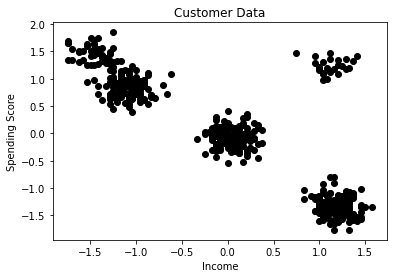

In [13]:
#plot the raw data
plt.figure();
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c="black");
plt.title("Customer Data");
plt.xlabel('Income');
plt.ylabel('Spending Score');
plt.xticks();
plt.yticks();

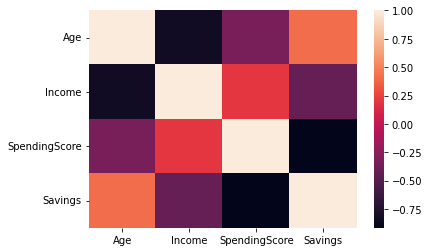

In [14]:
import seaborn as sns
sns.heatmap(X.corr())

## 1.1: Clustering Algorithm #1

In [15]:
#K-means
k_means = KMeans(n_clusters=5, random_state=42)
k_means.fit(X)

KMeans(n_clusters=5, random_state=42)

In [16]:
k_means.labels_

array([1, 1, 1, 1, 2, 3, 1, 2, 2, 2, 4, 0, 0, 0, 1, 4, 1, 2, 2, 4, 0, 4,
       1, 2, 4, 3, 3, 1, 2, 1, 1, 1, 2, 1, 0, 1, 2, 1, 0, 0, 1, 2, 3, 1,
       1, 3, 4, 3, 0, 1, 2, 0, 3, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 3, 3, 1, 1, 0, 2, 2, 0, 1, 0, 1, 1, 3, 1, 4, 1, 2, 2, 0, 0, 1,
       1, 1, 1, 1, 3, 2, 1, 3, 0, 1, 1, 0, 0, 3, 0, 3, 0, 2, 2, 0, 0, 1,
       2, 0, 1, 0, 0, 0, 1, 0, 3, 2, 0, 2, 2, 2, 0, 4, 1, 2, 1, 1, 0, 1,
       0, 1, 3, 2, 4, 3, 1, 0, 2, 1, 1, 3, 1, 3, 1, 4, 1, 2, 1, 0, 2, 1,
       2, 4, 0, 1, 2, 1, 0, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1,
       1, 2, 2, 2, 1, 1, 0, 3, 3, 2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 2, 3, 0,
       2, 2, 2, 0, 1, 0, 1, 0, 1, 2, 3, 1, 2, 2, 2, 2, 1, 2, 0, 3, 0, 2,
       1, 1, 0, 2, 0, 3, 0, 1, 1, 2, 1, 1, 2, 1, 1, 1, 0, 1, 0, 0, 3, 1,
       1, 1, 4, 1, 0, 2, 3, 3, 3, 2, 1, 0, 2, 2, 0, 0, 1, 1, 4, 1, 1, 2,
       1, 2, 0, 3, 1, 0, 2, 1, 2, 2, 0, 1, 2, 2, 1, 1, 2, 0, 0, 4, 0, 2,
       2, 0, 4, 2, 2, 3, 1, 0, 0, 1, 0, 2, 2, 0, 1,

In [17]:
# Let's look at the centers
k_means.cluster_centers_

array([[-1.08815238,  0.82744102, -0.75240648,  0.6270464 ],
       [ 0.03879611, -0.08524639,  1.02721559, -1.00569483],
       [ 1.19238486, -1.32510593, -0.67963841,  0.97016358],
       [-1.44466803,  1.46050665,  1.51057952, -1.57249636],
       [ 1.11876151,  1.23565419, -1.68367042,  0.59588052]])

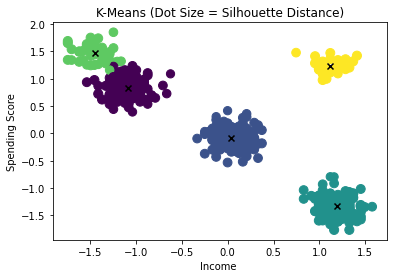

In [18]:
sample_silhouette_values = silhouette_samples(X, k_means.labels_)
sizes = 100*sample_silhouette_values

plt.figure();

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=sizes, c=k_means.labels_)
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], marker='x', c="black")

plt.title("K-Means (Dot Size = Silhouette Distance)");
plt.xlabel('Income ');
plt.ylabel('Spending Score');

In [19]:
sample_silhouette_values = silhouette_samples(X, k_means.labels_)

X_tmp = X.copy()
X_tmp['Cluster_ID'] = k_means.labels_

X_tmp['Silhouette'] = sample_silhouette_values
X_tmp = X_tmp.sort_values(['Silhouette'])
X_tmp.head()
X_tmp.tail()

,Age,Income,SpendingScore,Savings,Cluster_ID,Silhouette
196,-1.286268,1.327012,1.419709,-2.275742,3,0.656586
337,-1.742394,1.646975,1.360335,-2.399206,3,0.662592
290,1.160228,-0.795480,-0.757667,0.591929,2,0.673153
80,-0.000821,-0.026067,1.064913,-0.265897,1,0.674761
407,-0.622811,1.088200,-0.755187,0.445998,0,0.674795


,Age,Income,SpendingScore,Savings,Cluster_ID,Silhouette
372,1.201694,-1.471505,-0.571902,0.986563,2,0.867716
464,1.118762,-1.329586,-0.677416,1.065545,2,0.868368
121,1.201694,-1.374445,-0.741044,1.060476,2,0.869548
379,1.243160,-1.397806,-0.706762,0.945914,2,0.872481
335,1.243160,-1.350862,-0.690416,0.949109,2,0.872949


In [20]:
print('Sillouette Score for K: {}'.format(X))
silhouette_score(X, k_means.labels_)

Sillouette Score for K:           Age    Income  SpendingScore   Savings
0   -0.042287  0.062733       1.103593 -1.072467
1   -0.000821  0.174811       1.102641 -1.303473
2    0.123577 -0.021200       0.761727 -0.526556
3   -0.000821 -0.031712       1.004705 -0.913395
4    1.160228 -1.606165      -0.602619  1.012686
..        ...       ...            ...       ...
500 -1.286268  0.714535      -0.453557  0.621787
501  1.409024 -1.545704      -1.164109  1.235201
502  1.284626 -1.118447      -0.578054  0.855313
503  1.326092 -1.524929      -0.579866  1.322452
504  1.243160 -1.258335      -0.831890  0.510463

[505 rows x 4 columns]


0.8048976287755765

In [21]:
# In the case of K-Means, the cluster centers *are* the feature means - that's how K-Means is defined! Sweet!
scaler.inverse_transform(k_means.cluster_centers_)

array([[3.27777778e+01, 1.05265810e+05, 3.09926130e-01, 1.49627781e+04],
       [5.99554140e+01, 7.24480637e+04, 7.71518368e-01, 6.88997219e+03],
       [8.77755102e+01, 2.78661020e+04, 3.28800461e-01, 1.66592614e+04],
       [2.41800000e+01, 1.28029120e+05, 8.96891640e-01, 4.08752031e+03],
       [8.60000000e+01, 1.19944040e+05, 6.83780993e-02, 1.48086838e+04]])

In [22]:
# Print the Stats for the whole data set
# The cluster size I selected is 5 based on the Inertia score
# rerun the KMeans for K value 5
K=5

k_means=KMeans(init="k-means++", n_clusters=K, random_state=42)
k_means.fit(X)

# Print Labels and cluster centers
#k_means.labels_
#k_means.cluster_centers_
means = scaler.inverse_transform(k_means.cluster_centers_)

KMeans(n_clusters=5, random_state=42)

## 1.2: Clustering Algorithm #2

In [23]:
#DBSCAN
db = DBSCAN(eps=0.3, min_samples=3)
db.fit(X)

DBSCAN(eps=0.3, min_samples=3)

In [24]:
db.labels_

array([ 0,  0,  0,  0,  1,  2,  0,  1,  1,  1,  3,  4,  4,  4,  0,  3,  0,
        1,  1,  3,  4,  3,  0,  1, -1,  2,  2,  0,  1,  0,  0,  0,  1,  0,
        4,  0,  1,  0,  4,  4,  0,  1,  2,  0,  0,  2,  3,  2,  4,  0,  1,
        4,  2,  1,  0,  1,  4,  1,  1,  1,  1,  1,  1,  0,  0,  0,  1,  2,
        2,  0,  0,  4,  1,  1,  4,  0,  4,  0,  0,  2,  0, -1,  0,  1,  1,
        4,  4,  0,  0,  0,  0,  0,  2,  1,  0,  2,  4,  0,  0,  4,  4,  2,
        4,  2,  4,  1, -1,  4,  4,  0,  1,  4,  0,  4,  4,  4,  0,  4,  2,
        1,  4,  1,  1,  1,  4,  3,  0,  1,  0,  0,  4,  0,  4,  0,  2,  1,
        3,  2,  0,  4,  1,  0,  0,  2,  0,  2,  0,  3,  0,  1,  0,  4,  1,
        0,  1,  3,  4,  0,  1,  0,  4,  1,  0,  4, -1,  4,  1,  0,  4,  0,
        1,  0,  4,  0,  1,  0,  0,  1,  1,  1,  0,  0,  4,  2,  2,  1,  4,
        0,  0,  0,  4,  1,  0,  0,  0,  1, -1,  4,  1,  1,  1,  4,  0,  4,
        0,  4,  0,  1,  2,  0,  1,  1,  1,  1,  0,  1,  4,  2,  4,  1,  0,
        0,  4,  1,  4,  2

In [25]:
silhouette_score(X, db.labels_)

0.7679653694292776

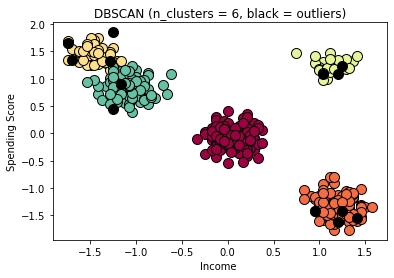

In [26]:
plt.figure();

unique_labels = set(db.labels_)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))];

for k in unique_labels:
    if k == -1:      
        col = [0, 0, 0, 1]
    else:
        col = colors[k]

    xy = X[db.labels_ == k]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=10);

    
plt.title('');
plt.title("DBSCAN (n_clusters = {:d}, black = outliers)".format(len(unique_labels)));
plt.xlabel('Income ');
plt.ylabel('Spending Score');

In [15]:
# Hierarchical (Agglomerative)
agg = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
agg.fit(X)

AgglomerativeClustering(n_clusters=5)

In [16]:
agg.labels_

array([1, 1, 1, 1, 0, 3, 1, 0, 0, 0, 4, 2, 2, 2, 1, 4, 1, 0, 0, 4, 2, 4,
       1, 0, 4, 3, 3, 1, 0, 1, 1, 1, 0, 1, 2, 1, 0, 1, 2, 2, 1, 0, 3, 1,
       1, 3, 4, 3, 2, 1, 0, 2, 3, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 3, 3, 1, 1, 2, 0, 0, 2, 1, 2, 1, 1, 3, 1, 4, 1, 0, 0, 2, 2, 1,
       1, 1, 1, 1, 3, 0, 1, 3, 2, 1, 1, 2, 2, 3, 2, 3, 2, 0, 0, 2, 2, 1,
       0, 2, 1, 2, 2, 2, 1, 2, 3, 0, 2, 0, 0, 0, 2, 4, 1, 0, 1, 1, 2, 1,
       2, 1, 3, 0, 4, 3, 1, 2, 0, 1, 1, 3, 1, 3, 1, 4, 1, 0, 1, 2, 0, 1,
       0, 4, 2, 1, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 2, 3, 3, 0, 2, 1, 1, 1, 2, 0, 1, 1, 1, 0, 3, 2,
       0, 0, 0, 2, 1, 2, 1, 2, 1, 0, 3, 1, 0, 0, 0, 0, 1, 0, 2, 3, 2, 0,
       1, 1, 2, 0, 2, 3, 2, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 1, 2, 2, 3, 1,
       1, 1, 4, 1, 2, 0, 3, 3, 3, 0, 1, 2, 0, 0, 2, 2, 1, 1, 4, 1, 1, 0,
       1, 0, 2, 3, 1, 2, 0, 1, 0, 0, 2, 1, 0, 0, 1, 1, 0, 2, 2, 4, 2, 0,
       0, 2, 4, 0, 0, 3, 1, 2, 2, 1, 2, 0, 0, 2, 1,

In [17]:
silhouette_score(X, agg.labels_)

0.8048976287755765

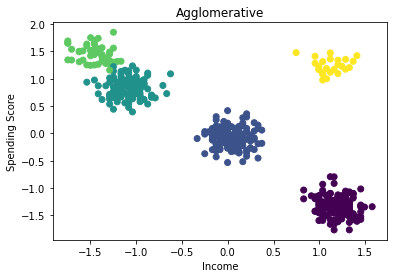

In [30]:
plt.figure();

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=agg.labels_);
plt.title("Agglomerative");
plt.xlabel('Income');
plt.ylabel('Spending Score');

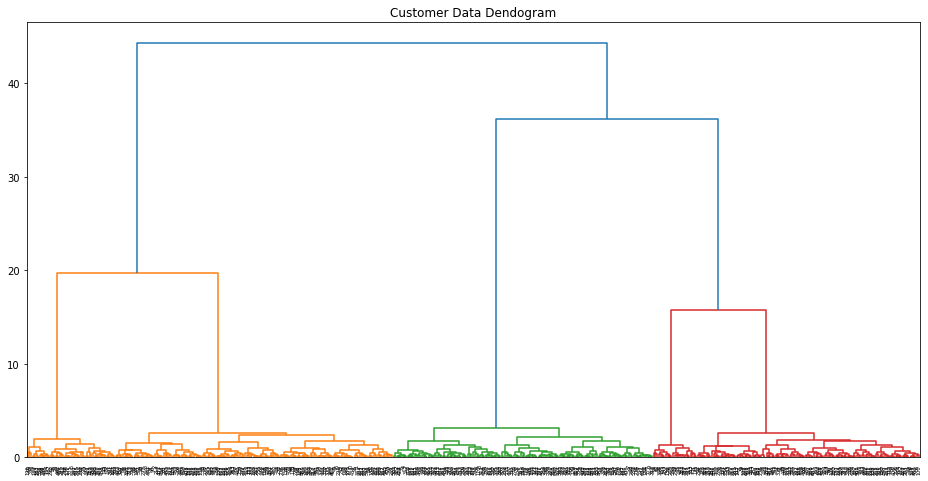

In [31]:
import scipy.cluster

aggl = scipy.cluster.hierarchy.linkage(X, method='ward', metric='euclidean')

# Plot the dendogram
plt.figure(figsize=(16, 8));
plt.grid(False)
plt.title("Customer Data Dendogram");  
dend = scipy.cluster.hierarchy.dendrogram(aggl); 


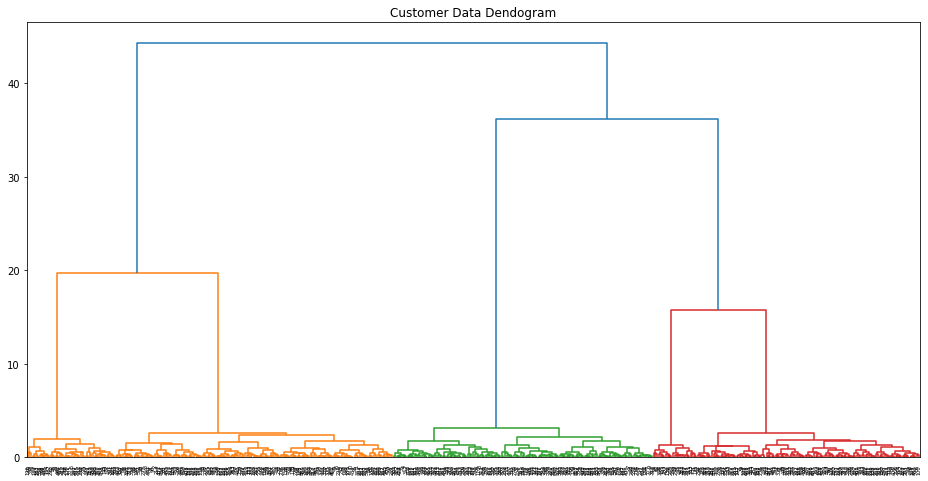

In [32]:

# Plot the dendogram 0 this time with better labels
plt.figure(figsize=(16, 8));
plt.grid(False)
plt.title("Customer Data Dendogram");  
dend = scipy.cluster.hierarchy.dendrogram(aggl); 
#plt.savefig('Customer Data.png');

In [33]:
# Let's find K=5 clusters
K=5
labels = scipy.cluster.hierarchy.fcluster(aggl, K, criterion="maxclust")

In [34]:
#df1['Cluster ID'] = labels
#df1.head(9)

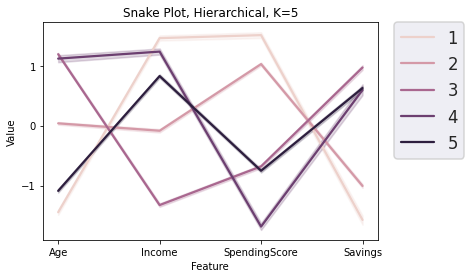

In [35]:
X_df1 = pd.DataFrame(X, columns=col_names)
X_df1['Cluster'] = labels
X_df1.head()

X_df1_melt = pd.melt(X_df1,
    id_vars=['Cluster'],
    value_vars=['Age', 'Income', 'SpendingScore','Savings'],
    var_name='Feature',
    value_name='Value')

plt.title('Snake Plot, Hierarchical, K=5');
sns.set(style="darkgrid")
sns.set_context("talk")
sns.lineplot(x="Feature", y="Value", hue='Cluster', data=X_df1_melt, legend="full");
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
plt.savefig('Customer Data.png', transparent=False);

## 1.3 Model Comparison

After applied two algorithims K-means and Hierarchical, I got the similar good score for both method. since the dataset is not very large and K=5 is a propler number to run both algorithms.


## 1.4 Personas
Based on Snake Plot, we have 5 different clusters.

Cluster 1 appears to have the youngest people, but they have the highest income and spending scores. This makes sense since young people tend to enjoy life and they may spend a lot on jewelry, probably because of their high spending, but they also have the lowest savings. Uncle Steve should send them more promotion mail.


In cluster 2, the average age is medium. They aren't very rich, but their spending score is in the second, probably because of their high expenditures and their savings in the penultimate level, so I suggest Uncle Steve give them a greater discount. Because they like our product, but they don't have enough money to afford it.


There are a lot of retired and old people in Cluster 3, so their income is the lowest compared to the other four clusters due to their high age. Rather than spending a lot on enjoying material goods, they save a lot. I suggest Uncle Steve give them more discounts to draw them to our store.


People in Cluster 4 are also old, but they worked hard or invested when they were young, so they are wealthy compared to the other 4 clusters. Yet they are very smart and not very materialistic, so their spending score is the lowest, and they also have good savings.


In cluster 5, the population is relatively young, they earn an average income, and they probably have a saving goal plan, so they don't spend as much as other groups, but they save the most. Since this group does not seem to be attracted by promotions, Uncle Steve should not be paying attention to them.


# Question 2: Uncle Steve's Fine Foods

## Instructions

Uncle Steve runs a small, local grocery store in Ontario. The store sells all the normal food staples (e.g., bread, milk, cheese, eggs, more cheese, fruits, vegatables, meat, fish, waffles, ice cream, pasta, cereals, drinks), personal care products (e.g., toothpaste, shampoo, hair goo), medicine, and cakes. There's even a little section with flowers and greeting cards! Normal people shop here, and buy normal things in the normal way.

Business is OK but Uncle Steve wants more. He's thus on the hunt for customer insights. Given your success at the jewelry store, he has asked you to help him out. 

He has given you a few years' worth of customer transactions, i.e., sets of items that customers have purchased. You have applied an association rules learning algorithm (like Apriori) to the data, and the algorithm has generated a large set of association rules of the form `{X} -> {Y}`, where `{X}` and `{Y}` are item-sets.

Now comes a thought experiment. For each of the following scenarios, state what one of the discovered association rules might be that would meet the stated condition. (Just make up the rule, using your human experience and intuition.) Also, describe whether and why each rule would be considered interesting or uninteresting for Uncle Steve (i.e., is this insight new to him? Would he be able to use it somehow?).

Keep each answer to 600 characters or less (including spaces).

To get those brain juices going, an example condition and answer is provided below:

> Condition: A rule that has high support.

> Answer: The rule `{milk} -> {bread}` would have high support, since milk and bread are household staples and a high percentage of transactions would include both `{milk}` and `{bread}`. Uncle Steve would likely not find this rule interesting, because these items are so common, he would have surely already noticed that so many transactions contain them.

**Marking**

Your responses will be marked as follows:

- *Correctness*. Rule meets the specificed condition, and seems plausible in an Ontario grocery store.
- *Justification of interestness*. Response clearly describes whether and why the rule would be considered interesting to Uncle Steve.

**Tips**

- There is no actual data for this question. This question is just a thought exercise. You need to use your intuition, creatitivty, and understanding of the real world. I assume you are familiar with what happens inside of normal grocery stores. We are not using actual data and you do not need to create/generate/find any data. I repeat: there is no data for this question.
- The reason this question is having you do a thought experiment, rather than writing and running code to find actual association rules on an actual dataset, is because writing code to find association rules is actually pretty easy. But using your brain to come up with rules that meet certain criteria, on the other hand, is a true test of whether you understand how the algorithm works, what support and confidence mean, and the applicability of rules. The question uses the grocery store context because most, if not all, students should be familiar from personal experience.



## 2.1: A rule that might have high support and high confidence. 

Suppose
X = Soap 
Y = Lotion 
{Soap} → {Lotion} 
Support = 3/5 = 0.6% 
Confidence = 3/4 = 0.75% 

Because soap and lotion are used by every household, Uncle Steve is interested in this rule, since he can package soap with lotion for sale

## 2.2: A rule that might have reasonably high support but low confidence.

Suppose
X = Sprit
Y = Almond milk
{Soap} → {Lotion} 
Support = 3/5 = 0.6% 
Confidence = 1/4 = 0.25% 

Sprit and Almond milk appear to have a strong relationship because they have high support, however, they are two different types of drinks; one is a soft drink and the other is a healthy drink, so their confidence is low and they represent two different lifestyles. Uncle Steve is not interested in this rule, he will keep Sprit from Almond milk and never think about binding the price of them.

## 2.3: A rule that might have low support and low confidence.

Suppose the support of {men's underwar}=>{contact lens solutions}=0.15 and the confidence{men's underwear}=>{contact lens solutions}=0.12, it indicate





Suppose
X = contact lens solutions
Y = men's underweaer
{contact lens solutions} → {men's underwear} 
Support = 3/10= 0.3
Confidence = 1/8 = 0.125 

Uncle Steve is not interested in this rule, since if the customer buy a contact lens solutions, he is unlikley to buy men's underwaer,  due to the low conifidence, contact lens solutions and men's underwear are hard to appear in one transaction at the same time. I do not advice Uncle Steve package the price of them for sale.

## 2.4: A rule that might have low support and high confidence.

Suppose
X = bread
Y = diapers 
{bread} → {diapers} 
Support = 1.5/5 = 0.3 
Confidence = 3/4 = 0.75 

Uncle Steve is interested in this rule, 



Suppose
X = cereal
Y = diapers
{cereal} → {diapers} 
Support = 1.5/5=0.3
Confidence = 3/4=0.75


As a result of high confidence, Uncle Steve is very interested in this rule since, if a customer buys cereal, he is more likely to buy diapers as well. It is easy for cereal and diapers to appear at the same time in a customer transaction. Uncle Steve should increase the price of cereal and lower the price of diapers in order to attract more customers and maximize profits.


# Question 3: Uncle Steve's Credit Union

## Instructions

Uncle Steve has recently opened a new credit union in Kingston, named *Uncle Steve's Credit Union*. He plans to disrupt the local market by instaneously providing credit to customers.

The first step in Uncle Steve's master plan is to create a model to predict whether an application has *good risk* or *bad risk*. He has outsourced the creation of this model to you.

You are to create a classification model to predict whether a loan applicant has good risk or bad risk. You will use data  that Uncle Steve bought from another credit union (somewhere in Europe, he thinks?) that has around 6000 instances and a number of demographics features (e.g., `Sex`, `DateOfBirth`, `Married`), loan details (e.g., `Amount`, `Purpose`), credit history (e.g., number of loans), as well as an indicator (called `BadCredit` in the dataset) as to whether that person was a bad risk.


**Your tasks**

To examine the effects of the various ML stages, you are to create the model several times, each time adding more sophistication, and measuring how much the model improved (or not). In particular, you will:

0. Split the data in training and testing. Don't touch the testing data again, for any reason, until step 5. We are pretending that the testing data is "future, unseen data that our model won't see until production." I'm serious, don't touch it. I'm watching you!
1. Build a baseline model - no feature engineering, no feature selection, no hyperparameter tuning (just use the default settings), nothing fancy. (You may need to do some basic feature transformations, e.g., encoding of categorical features, or dropping of features you do not think will help or do not want to deal with yet.) Measure the performance using K-fold cross validation (recommended: [`sklearn.model_selection.cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score)) on the training data. Use at least 5 folds, but more are better. Choose a [`scoring` parameter](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) (i.e., classification metric) that you feel is appropriate for this task. Don't use accuracy. Print the mean score of your model.
2. Add a bit of feature engineering. The [`sklearn.preprocessing`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) module contains many useful transformations. Engineer at least three new features. They don't need to be especially ground-breaking or complicated. Dimensionality reduction techniques like [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) are fair game but not required. (If you do use dimensionality reduction techniques, it would only count as "one" new feature for the purposes of this assignment, even though I realize that PCA creates many new "features" (i.e., principal componentns).) Re-train your baseline model. Measure performance. Compare to step 1.
3. Add feature selection. The [`sklearn.feature_selection`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection) has some algorithms for you to choose from. After selecting features, re-train your model, measure performance, and compare to step 2.
4. Add hyperparameter tuning. Make reasonable choices and try to find the best (or at least, better) hyperparameters for your estimator and/or transformers. It's probably a good idea to stop using `cross_val_score` at this point and start using [`sklearn.model_selection.GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) as it is specifically built for this purpose and is more convienient to use. Measure performance and compare to step 3.
5. Finally, estimate how well your model will work in production. Use the testing data (our "future, unseen data") from step 0. Transform the data as appropriate (easy if you've built a pipeline, a little more difficult if not), use the model from step 4 to get predictions, and measure the performance. How well did we do? 


**Marking**

Each part will be marked for:
- *Correctness*. Code clearly and fully performs the task specified.
- *Reproducibility*. Code is fully reproducible. I.e., you (and I) should be able to run this Notebook again and again, from top to bottom, and get the same results each and every time.
- *Style*. Code is organized. All parts commented with clear reasoning and rationale. No old code laying around. Code easy to follow. 


**Tips**
- The origins of the dataset are a bit of a mystery. Assume the data set is recent (circa 2021) and up-to-date. Assume that column names are correct and accurate.
- You don't need to experiment with more than one algorithm/estimator. Just choose one (e.g., [`sklearn.tree.DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier), [`sklearn.ensemble.RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier), [`sklearn.linear_model.LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression), [`sklearn.svm.LinearSVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC), whatever) and stick with it for this question. 
- There is no minimum accuracy/precision/recall for this question. I.e., your mark will not be based on how good your model is. Rather, you mark will be based on good your process is.
- Watch out for data leakage and overfitting. In particular, be sure to `fit()` any estimators and transformers (collectively, *objects*) only to the training data, and then use the objects' `transform()` methods on both the training and testing data. [Data School](https://www.youtube.com/c/dataschool/featured) has a [helpful video](https://www.youtube.com/watch?v=g2XsZdwbCCs) about this. [Pipelines](https://www.youtube.com/watch?v=1Y6O9nCo0-I) are very helpful here and make your code shorter and more robust (at the expense of making it harder to understand), and I recommend using them, but they are not required for this assignment.
- Create as many code cells as you need. In general, each cell should do one "thing."
-	Don't print large volumes of output. E.g., don't do: `df.head(100)`




## 3.0: Load data and split

In [6]:
# DO NOT MODIFY THIS CELL

# First, we'll read the provided labeled training data
df3 = pd.read_csv("https://drive.google.com/uc?export=download&id=1wOhyCnvGeY4jplxI8lZ-bbYN3zLtickf")
df3.info()

from sklearn.model_selection import train_test_split

X = df3.drop('BadCredit', axis=1) #.select_dtypes(['number'])
y = df3['BadCredit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UserID             6000 non-null   object
 1   Sex                6000 non-null   object
 2   PreviousDefault    6000 non-null   int64 
 3   FirstName          6000 non-null   object
 4   LastName           6000 non-null   object
 5   NumberPets         6000 non-null   int64 
 6   PreviousAccounts   6000 non-null   int64 
 7   ResidenceDuration  6000 non-null   int64 
 8   Street             6000 non-null   object
 9   LicensePlate       6000 non-null   object
 10  BadCredit          6000 non-null   int64 
 11  Amount             6000 non-null   int64 
 12  Married            6000 non-null   int64 
 13  Duration           6000 non-null   int64 
 14  City               6000 non-null   object
 15  Purpose            6000 non-null   object
 16  DateOfBirth        6000 non-null   object


In [7]:
X_train.shape

(4800, 16)

In [8]:
X_train.head(5)

,UserID,Sex,PreviousDefault,FirstName,LastName,NumberPets,PreviousAccounts,ResidenceDuration,Street,LicensePlate,Amount,Married,Duration,City,Purpose,DateOfBirth
3897,236-22-6766,M,0,Jerry,Black,2,0,2,0466 Brown Wall,3-U8282,3329,0,12,New Roberttown,Household,1970-04-22
5628,766-20-5986,F,0,Julia,Jones,0,2,2,6095 Larson Causeway,LWO 912,2996,0,36,Ericmouth,Household,1964-06-19
1756,744-25-5747,F,0,Abigail,Estrada,2,0,3,293 Michael Divide,715 OQT,2470,0,24,East Jill,NewCar,1975-02-17
2346,463-78-3098,F,0,Jessica,Jones,2,1,2,02759 Williams Roads,869 SYK,3745,0,30,Lake Debra,UsedCar,1977-02-16
2996,414-44-6527,M,0,William,Shaffer,0,1,3,19797 Turner Rue,48-A601,3549,0,36,North Judithbury,Vacation,1976-07-27


In [9]:
# TODO: Insert code here. Feel free to create additional code cells if necessary.
X_train1=X_train.drop(labels=['UserID','FirstName','LastName','LicensePlate','Street','DateOfBirth'],axis=1)
X_train1.head(5)


,Sex,PreviousDefault,NumberPets,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,City,Purpose
3897,M,0,2,0,2,3329,0,12,New Roberttown,Household
5628,F,0,0,2,2,2996,0,36,Ericmouth,Household
1756,F,0,2,0,3,2470,0,24,East Jill,NewCar
2346,F,0,2,1,2,3745,0,30,Lake Debra,UsedCar
2996,M,0,0,1,3,3549,0,36,North Judithbury,Vacation


In [10]:
X_train1['Married']= X_train1['Married'].astype("object")

In [11]:

# Getting the categorical variables
categorical_values = X_train1.select_dtypes(include=['object'])
print("Categorical Variables")
categorical_values.columns


Categorical Variables


Index(['Sex', 'Married', 'City', 'Purpose'], dtype='object')

In [12]:

# Getting the numeric variables
numeric_values = X_train1.select_dtypes(include=['int64'])
print("Numeric Variables")
numeric_values.columns



Numeric Variables


Index(['PreviousDefault', 'NumberPets', 'PreviousAccounts',
       'ResidenceDuration', 'Amount', 'Duration'],
      dtype='object')

In [13]:

categorical_encoded = pd.get_dummies(categorical_values, drop_first=True)
categorical_encoded.dtypes


Sex_M                    uint8
Married_1                uint8
City_East Jessetown      uint8
City_East Jill           uint8
City_Ericmouth           uint8
City_Herrerafurt         uint8
City_Jacquelineland      uint8
City_Lake Chad           uint8
City_Lake Debra          uint8
City_Lake Roberto        uint8
City_Lisatown            uint8
City_New Jessica         uint8
City_New Kellystad       uint8
City_New Roberttown      uint8
City_North Judithbury    uint8
City_North Noahstad      uint8
City_Port Jesseville     uint8
City_Port Keith          uint8
City_Ramirezstad         uint8
City_Robinsonshire       uint8
City_West Michael        uint8
Purpose_Education        uint8
Purpose_Household        uint8
Purpose_NewCar           uint8
Purpose_Other            uint8
Purpose_Repair           uint8
Purpose_UsedCar          uint8
Purpose_Vacation         uint8
dtype: object

In [14]:
X_train1=pd.concat([numeric_values, categorical_encoded], axis=1)

In [15]:
X_train1.isnull().sum()

PreviousDefault          0
NumberPets               0
PreviousAccounts         0
ResidenceDuration        0
Amount                   0
Duration                 0
Sex_M                    0
Married_1                0
City_East Jessetown      0
City_East Jill           0
City_Ericmouth           0
City_Herrerafurt         0
City_Jacquelineland      0
City_Lake Chad           0
City_Lake Debra          0
City_Lake Roberto        0
City_Lisatown            0
City_New Jessica         0
City_New Kellystad       0
City_New Roberttown      0
City_North Judithbury    0
City_North Noahstad      0
City_Port Jesseville     0
City_Port Keith          0
City_Ramirezstad         0
City_Robinsonshire       0
City_West Michael        0
Purpose_Education        0
Purpose_Household        0
Purpose_NewCar           0
Purpose_Other            0
Purpose_Repair           0
Purpose_UsedCar          0
Purpose_Vacation         0
dtype: int64

In [16]:
X_train1.shape

(4800, 34)

## 3.1: Baseline model

In [17]:
X_train1=pd.concat([numeric_values, categorical_encoded], axis=1)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
Clf = DecisionTreeClassifier(random_state=0)
scores=cross_val_score(Clf, X_train1, y_train, cv=5,scoring= 'f1_micro')
print("Mean Accuracy: {:.4f}".format(np.mean(scores)))

Mean Accuracy: 0.7721


In [18]:
X_train1.shape
X_train1.head(n=5)
X_train1.tail


<bound method NDFrame.tail of       PreviousDefault  NumberPets  PreviousAccounts  ResidenceDuration  \
3897                0           2                 0                  2   
5628                0           0                 2                  2   
1756                0           2                 0                  3   
2346                0           2                 1                  2   
2996                0           0                 1                  3   
...               ...         ...               ...                ...   
3772                0           0                 1                  1   
5191                0           2                 1                  0   
5226                0           2                 1                  3   
5390                0           1                 1                  3   
860                 0           1                 2                  0   

      Amount  Duration  Sex_M  Married_1  City_East Jessetown  City_East Jill  \


## 3.2: Feature engineering

In [19]:
def plot_hist(feature, title):
    plt.figure(figsize=(8, 5));
    plt.hist(feature, bins=20, edgecolor='black', linewidth=1.2);
    plt.title(title, fontsize=20);
    #ax.tick_params(axis='both', which='major', labelsize=18);
    plt.grid(True);

In [20]:
X_train1['PreviousAccounts'].head(10)

3897    0
5628    2
1756    0
2346    1
2996    1
1595    2
5966    0
3252    1
829     1
5864    2
Name: PreviousAccounts, dtype: int64

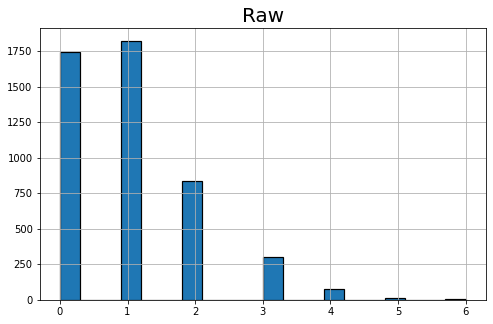

In [22]:
import matplotlib.pyplot as plt
plot_hist(X_train1['PreviousAccounts'], "Raw");

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train1[['ResidenceDuration']])

X_train1['ResidenceDuration'] = scaler.transform(X_train1[['ResidenceDuration']])   


StandardScaler()

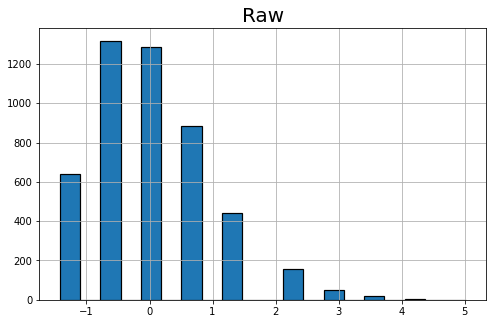

In [24]:
plot_hist(X_train1['ResidenceDuration'], "Raw");

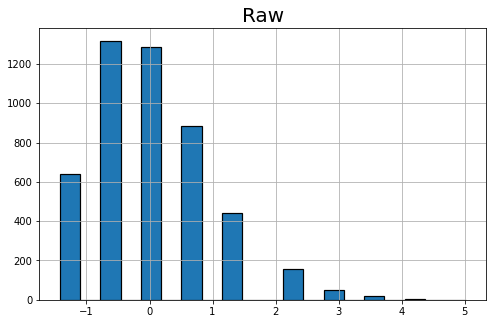

In [25]:
plot_hist(X_train1['ResidenceDuration'], "Raw");

In [26]:
from sklearn.preprocessing import FunctionTransformer

scaler = FunctionTransformer(np.log1p, validate=True)
scaler.fit(X_train1[['Amount']])
X_train1['Amount'] = scaler.transform(X_train1[['Amount']])   


FunctionTransformer(func=<ufunc 'log1p'>, validate=True)

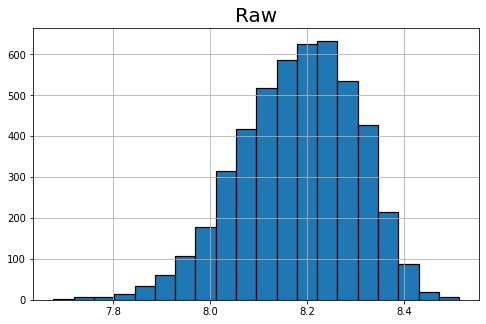

In [27]:
plot_hist(X_train1['Amount'], "Raw");

In [28]:
X_train1=pd.concat([numeric_values, categorical_encoded], axis=1)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
Clf = DecisionTreeClassifier(random_state=0)
scores=cross_val_score(Clf, X_train1, y_train, cv=5,scoring= 'f1_micro')
print("Mean Accuracy: {:.4f}".format(np.mean(scores)))

Mean Accuracy: 0.7721


In [29]:
X_train1.shape

(4800, 34)

In [30]:
X_train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4800 entries, 3897 to 860
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   PreviousDefault        4800 non-null   int64
 1   NumberPets             4800 non-null   int64
 2   PreviousAccounts       4800 non-null   int64
 3   ResidenceDuration      4800 non-null   int64
 4   Amount                 4800 non-null   int64
 5   Duration               4800 non-null   int64
 6   Sex_M                  4800 non-null   uint8
 7   Married_1              4800 non-null   uint8
 8   City_East Jessetown    4800 non-null   uint8
 9   City_East Jill         4800 non-null   uint8
 10  City_Ericmouth         4800 non-null   uint8
 11  City_Herrerafurt       4800 non-null   uint8
 12  City_Jacquelineland    4800 non-null   uint8
 13  City_Lake Chad         4800 non-null   uint8
 14  City_Lake Debra        4800 non-null   uint8
 15  City_Lake Roberto      4800 non-null

## 3.3: Feature selection

In [23]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(0.1));
sel = sel.fit(X_train1);

X_train1_new = sel.transform(X_train1)


clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_train1_new, y_train)

scores=cross_val_score(Clf, X_train1_new, y_train, cv=5,scoring= 'f1_micro')
print("Mean Accuracy: {:.4f}".format(np.mean(scores)))




Mean Accuracy: 0.7656


In [24]:
sel.variances_

array([1.97999566e-02, 6.67065972e-01, 1.02018121e+00, 1.95366597e+00,
       1.80794384e+05, 8.81747984e+01, 2.11812326e-01, 2.49970660e-01,
       6.59947483e-02, 1.17382639e-01, 3.12489149e-02, 1.96000000e-02,
       1.15305556e-02, 1.97999566e-02, 5.45623264e-02, 3.29993056e-02,
       3.39687066e-02, 1.37634983e-02, 2.01996094e-02, 8.78259983e-02,
       1.99281207e-01, 2.81197483e-02, 1.43706597e-02, 1.85989149e-02,
       1.91998264e-02, 4.97437500e-02, 1.31555556e-02, 5.08609375e-02,
       8.96664931e-02, 2.11240234e-01, 1.30399306e-01, 6.72437500e-02,
       1.76874826e-01, 6.75998264e-02])

## 3.4: Hyperparameter tuning

In [25]:

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

clf = DecisionTreeClassifier(random_state=42)

params = {"criterion": ["gini", "entropy"],
          "splitter": ["best", "random"],
          "class_weight": ['balanced', None], 
          "max_depth": randint(2, 21),
          "min_samples_leaf": randint(1, 11),
          "max_features": uniform(0.0, 1.0)}

search = RandomizedSearchCV(clf, param_distributions=params, n_iter=1000, scoring='f1_macro', cv=10, verbose=1)
search = search.fit(X_train1, y_train)

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits


In [26]:
Params = search.best_params_

In [27]:
Params 

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': 0.97390343880018,
 'min_samples_leaf': 1,
 'splitter': 'random'}

In [28]:
Clf = DecisionTreeClassifier(**Params, random_state=0)
scores=cross_val_score(Clf, X_train1, y_train, cv=5,scoring= 'f1_micro')
print("Mean Accuracy: {:.4f}".format(np.mean(scores)))

Mean Accuracy: 0.6667


## 3.5: Performance estimation

In [29]:

X_test=X_test.drop(labels=['UserID','FirstName','LastName','LicensePlate','Street','DateOfBirth'],axis=1)

In [30]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 1782 to 1765
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sex                1200 non-null   object
 1   PreviousDefault    1200 non-null   int64 
 2   NumberPets         1200 non-null   int64 
 3   PreviousAccounts   1200 non-null   int64 
 4   ResidenceDuration  1200 non-null   int64 
 5   Amount             1200 non-null   int64 
 6   Married            1200 non-null   int64 
 7   Duration           1200 non-null   int64 
 8   City               1200 non-null   object
 9   Purpose            1200 non-null   object
dtypes: int64(7), object(3)
memory usage: 103.1+ KB


In [31]:
X_test['Married']= X_test['Married'].astype("object")

In [32]:
categorical_values_t = X_test.select_dtypes(include=['object'])
print("Categorical Variables")
categorical_values.columns

Categorical Variables


Index(['Sex', 'Married', 'City', 'Purpose'], dtype='object')

In [33]:
numeric_values_t = X_test.select_dtypes(include=['int64'])
print("Numeric Variables")
numeric_values.columns

Numeric Variables


Index(['PreviousDefault', 'NumberPets', 'PreviousAccounts',
       'ResidenceDuration', 'Amount', 'Duration'],
      dtype='object')

In [34]:
categorical_encoded_t = pd.get_dummies(categorical_values_t, drop_first=True)
categorical_encoded_t.dtypes

Sex_M                    uint8
Married_1                uint8
City_East Jessetown      uint8
City_East Jill           uint8
City_Ericmouth           uint8
City_Herrerafurt         uint8
City_Jacquelineland      uint8
City_Lake Chad           uint8
City_Lake Debra          uint8
City_Lake Roberto        uint8
City_Lisatown            uint8
City_New Jessica         uint8
City_New Kellystad       uint8
City_New Roberttown      uint8
City_North Judithbury    uint8
City_North Noahstad      uint8
City_Port Jesseville     uint8
City_Port Keith          uint8
City_Ramirezstad         uint8
City_Robinsonshire       uint8
City_West Michael        uint8
Purpose_Education        uint8
Purpose_Household        uint8
Purpose_NewCar           uint8
Purpose_Other            uint8
Purpose_Repair           uint8
Purpose_UsedCar          uint8
Purpose_Vacation         uint8
dtype: object

In [35]:
X_test=pd.concat([numeric_values_t, categorical_encoded_t], axis=1)

In [36]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 1782 to 1765
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   PreviousDefault        1200 non-null   int64
 1   NumberPets             1200 non-null   int64
 2   PreviousAccounts       1200 non-null   int64
 3   ResidenceDuration      1200 non-null   int64
 4   Amount                 1200 non-null   int64
 5   Duration               1200 non-null   int64
 6   Sex_M                  1200 non-null   uint8
 7   Married_1              1200 non-null   uint8
 8   City_East Jessetown    1200 non-null   uint8
 9   City_East Jill         1200 non-null   uint8
 10  City_Ericmouth         1200 non-null   uint8
 11  City_Herrerafurt       1200 non-null   uint8
 12  City_Jacquelineland    1200 non-null   uint8
 13  City_Lake Chad         1200 non-null   uint8
 14  City_Lake Debra        1200 non-null   uint8
 15  City_Lake Roberto      1200 non-nul

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_test[['ResidenceDuration']])

X_test['ResidenceDuration_Std'] = scaler.transform(X_test[['ResidenceDuration']])  

In [38]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 1782 to 1765
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PreviousDefault        1200 non-null   int64  
 1   NumberPets             1200 non-null   int64  
 2   PreviousAccounts       1200 non-null   int64  
 3   ResidenceDuration      1200 non-null   int64  
 4   Amount                 1200 non-null   int64  
 5   Duration               1200 non-null   int64  
 6   Sex_M                  1200 non-null   uint8  
 7   Married_1              1200 non-null   uint8  
 8   City_East Jessetown    1200 non-null   uint8  
 9   City_East Jill         1200 non-null   uint8  
 10  City_Ericmouth         1200 non-null   uint8  
 11  City_Herrerafurt       1200 non-null   uint8  
 12  City_Jacquelineland    1200 non-null   uint8  
 13  City_Lake Chad         1200 non-null   uint8  
 14  City_Lake Debra        1200 non-null   uint8  
 15  C

In [47]:
from sklearn.preprocessing import FunctionTransformer

scaler = FunctionTransformer(np.log1p, validate=True)
scaler.fit(X_test[['Amount']])
X_test['Amount'] = scaler.transform(X_test[['Amount']])   


FunctionTransformer(func=<ufunc 'log1p'>, validate=True)

In [48]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 1782 to 1765
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PreviousDefault        1200 non-null   int64  
 1   NumberPets             1200 non-null   int64  
 2   PreviousAccounts       1200 non-null   int64  
 3   ResidenceDuration      1200 non-null   int64  
 4   Amount                 1200 non-null   float64
 5   Duration               1200 non-null   int64  
 6   Sex_M                  1200 non-null   uint8  
 7   Married_1              1200 non-null   uint8  
 8   City_East Jessetown    1200 non-null   uint8  
 9   City_East Jill         1200 non-null   uint8  
 10  City_Ericmouth         1200 non-null   uint8  
 11  City_Herrerafurt       1200 non-null   uint8  
 12  City_Jacquelineland    1200 non-null   uint8  
 13  City_Lake Chad         1200 non-null   uint8  
 14  City_Lake Debra        1200 non-null   uint8  
 15  C

In [49]:
from sklearn.metrics import f1_score
clf = DecisionTreeClassifier(random_state=42, criterion="entropy",
                             min_samples_split=10, min_samples_leaf=10, max_depth=3, max_leaf_nodes=5)
clf.fit(X_train1, y_train)

y_pred = clf.predict(X_test)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=5,
                       min_samples_leaf=10, min_samples_split=10,
                       random_state=42)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- ResidenceDuration_Std
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: ignored

In [180]:
Clf = DecisionTreeClassifier(random_state=0)
scores=cross_val_score(Clf, X_test, y_test, cv=5,scoring= 'f1_micro')
print("Mean Accuracy: {:.4f}".format(np.mean(scores)))

Mean Accuracy: 0.7692


# Question 4: Uncle Steve's Wind Farm

## Instructions


Uncle Steve has invested in wind. He's built a BIG wind farm with a total of  700 turbines. He's been running the farm for a couple of years now and things are going well. He sells the power generated by the farm to the Kingston government and makes a tidy profit. And, of course, he has been gathering data about the turbines' operations.

One area of concern, however, is the cost of maintenece. While the turbines are fairly robust, it seems like one breaks/fails every couple of days. When a turbine fails, it usually costs around \$20,000 to repair it. Yikes!

Currently, Uncle Steve is not doing any preventative maintenance. He just waits until a turbine fails, and then he fixes it. But Uncle Steve has recently learned that if he services a turbine *before* it fails, it will only cost around $2,000. 

Obviously, there is a potential to save a lot of money here. But first, Uncle Steve would need to figure out *which* turbines are about to fail. Uncle Steve being Uncle Steve, he wants to use ML to build a predictive maintenance model. The model will alert Uncle Steve to potential turbine failures before they happen, giving Uncle Steve a chance to perform an inspection on the turbine and then fix the turbine before it fails. Uncle Steve plans to run the model every morning. For all the turbines that the model predicts will fail, Uncle Steve will order an inspection (which cost a flat \$500, no matter if the turbine was in good health or not; the \$500 would not be part of the $2,000 service cost). For the rest of the turbines, Uncle Steve will do nothing.

Uncle Steve has used the last few year's worth of operation data to build and assess a model to predict which turbines will fail on any given day. (The data includes useful features like sensor readings, power output, weather, and many more, but those are not important for now.) In fact, he didn't stop there: he built and assessed two models. One model uses using deep learning (in this case, RNNs), and the other uses random forests.

He's tuned the bejeebers out of each model and is comfortable that he has found the best-performing version of each. Both models seem really good: both have accuracy scores > 99%. The RNN has better recall, but Uncle Steve is convinced that the random forest model will be better for him since it has better precision. Just to be sure, he has hired you to double check his calculations. 

**Your task**

 Which model will save Uncle Steve more money? Justify.


In addition to the details above, here is the assessment of each model:

- Confusion matrix for the random forest:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 201 | 55 |
| **Actual No Fail**   | 50 | 255195 |

- Confusion matrix for the RNN:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 226 | 30 |
| **Actual No Fail**   | 1200 | 254045 |


**Marking**

- *Quality*. Response is well-justified and convincing. 
- *Style*. Response uses proper grammar, spelling, and punctuation. Response is clear and professional. Response is complete, but not overly-verbose. Response follows length guidelines.



**Tips**

- Figure out how much Uncle Steve is currently (i.e., without any predictive maintinance models) paying in maintenance costs.
- Use the information provided above to create a cost matrix.
- Use the cost matrix and the confusion matrices to determine the costs of each model.
- The cost of an inspection is the same, no matter if the turbine is in good condition or is about to fail.
- If the inspection determines that a turbine is about to fail, then it will be fixed right then and there for the additional fee.
- For simplicity, assume the inspections are perfect: i.e., that inspecting a turbine will definitely catch any problems that might exist, and won't accidentally flag an otherwise-healthy turbine.




Solution:

- Confusion matrix for the random forest:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 201 | 55 |
| **Actual No Fail**   | 50 | 255195|




- Cost Matrix for random forest:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 2500 | 20,000 |
| **Actual No Fail**   | 500 | 0|



Accuracy: 201 + 255195 / 201 + 55 + 500 + 255195 = 0.9996

Cost:201 X 2500 + 55 X 20000 + 50 X 500 + 0 = 1627500






-----------------------------------------------------------------------------












- Confusion matrix for the RNN:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 226 | 30 |
| **Actual No Fail**   | 1200 | 254045 |


- Cost matrix for the RNN:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 2500 | 20000 |
| **Actual No Fail**   | 500| 0 |




Accuracy: 226 + 254045 / 226 + 30 + 1200 + 254045 = 0.9952

Cost: 226 X 2500 + 30 X 20000 + 1200 X 500 + 0 = 1765000




